<a href="https://colab.research.google.com/github/ponwinsiya2348539/lab1_ml/blob/main/2348539_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


In [2]:
df = pd.read_csv('/content/sample_data/employee_data (1) 2 - employee_data (1) 2.csv')


In [3]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


Text(0, 0.5, 'Frequency')

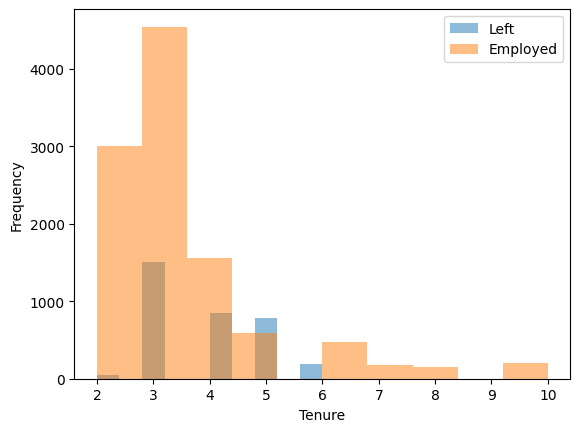

In [4]:
# Histogram of tenure
plt.hist(df[df['status']=='Left']['tenure'], alpha=0.5, label='Left')
plt.hist(df[df['status']=='Employed']['tenure'], alpha=0.5, label='Employed')
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Frequency')

<Axes: xlabel='status', ylabel='satisfaction'>

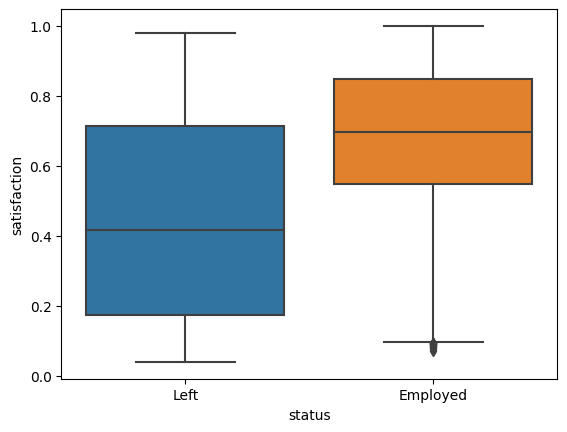

In [5]:
# Boxplot of satisfaction
sns.boxplot(x='status', y='satisfaction', data=df)

([<matplotlib.patches.Wedge at 0x7b32b097ca00>,
 [Text(-0.8064592186333274, 0.7480798945843441, 'Left'),
  Text(0.8064592536534737, -0.7480798568312627, 'Employed')],
 [Text(-0.43988684652726945, 0.40804357886418763, '76.2%'),
  Text(0.4398868656291674, -0.4080435582715978, '23.8%')])

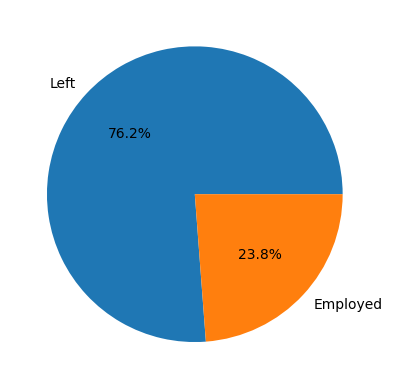

In [6]:
# Pie chart of attrition
values = df['status'].value_counts()
labels = ['Left', 'Employed']
plt.pie(values, labels=labels, autopct='%0.1f%%')

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

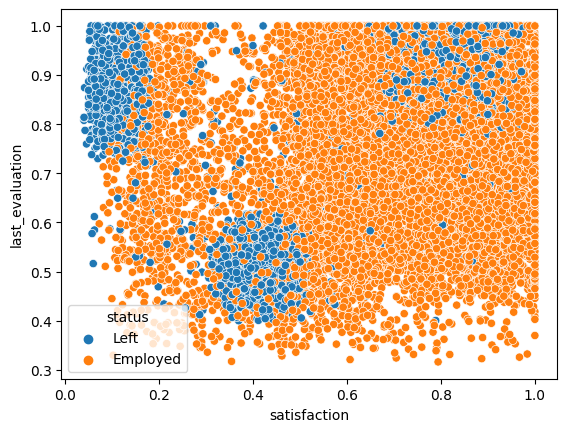

In [7]:
# Scatter plot of satisfaction vs evaluation
sns.scatterplot(x='satisfaction', y='last_evaluation', hue='status', data=df)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
X = df.drop(['status'], axis=1)
y = df['status']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Encode categorical columns
ordinal_encoder = OrdinalEncoder()
categorical_cols = ['department', 'salary', 'recently_promoted', 'filed_complaint']

X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

In [18]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Ensure y matches the rows of X_train

In [19]:
gini_tree = DecisionTreeClassifier(criterion='gini')
gini_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# Entropy model
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)

In [21]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer (use the same strategy and parameters as before)
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_test to fill missing values
X_test = imputer.fit_transform(X_test)

In [22]:
y_pred_gini = gini_tree.predict(X_test)
y_pred_entropy = entropy_tree.predict(X_test)

print('Gini accuracy: ', accuracy_score(y_test, y_pred_gini))
print('Entropy accuracy: ', accuracy_score(y_test, y_pred_entropy))

Gini accuracy:  0.7842105263157895
Entropy accuracy:  0.7680701754385965


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_gini_encoded = label_encoder.transform(y_pred_gini)
y_pred_entropy_encoded = label_encoder.transform(y_pred_entropy)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision_gini = precision_score(y_test_encoded, y_pred_gini_encoded)
precision_entropy = precision_score(y_test_encoded, y_pred_entropy_encoded)

recall_gini = recall_score(y_test_encoded, y_pred_gini_encoded)
recall_entropy = recall_score(y_test_encoded, y_pred_entropy_encoded)

f1_gini = f1_score(y_test_encoded, y_pred_gini_encoded)
f1_entropy = f1_score(y_test_encoded, y_pred_entropy_encoded)

print('Gini precision:', precision_gini)
print('Entropy precision:', precision_entropy)

print('Gini recall:', recall_gini)
print('Entropy recall:', recall_entropy)

print('Gini F1:', f1_gini)
print('Entropy F1:', f1_entropy)

Gini precision: 0.597457627118644
Entropy precision: 0.0
Gini recall: 0.21331316187594554
Entropy recall: 0.0
Gini F1: 0.31438127090301005
Entropy F1: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


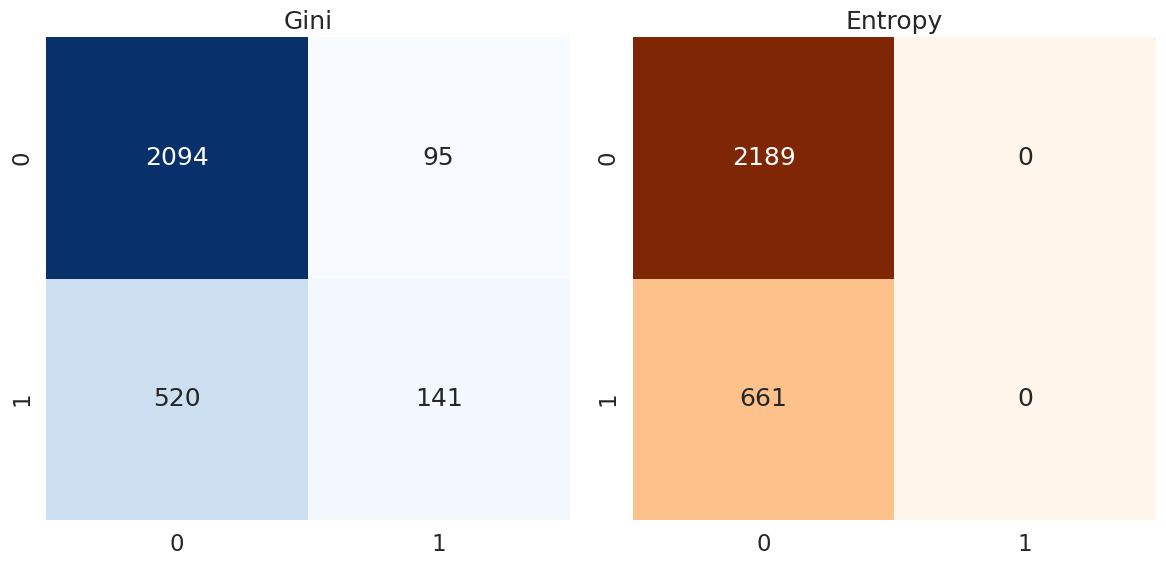

In [25]:
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_gini_encoded),
            annot=True, cbar=False, cmap='Blues',
            fmt='d')
plt.title('Gini')

plt.subplot(122)
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_entropy_encoded),
            annot=True, cbar=False, cmap='Oranges',
            fmt='d')
plt.title('Entropy')

plt.tight_layout()
plt.show()

<ipython-input-26-ca3bf0874bcf>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(features, rotation=45, ha='right')  # Rotate and align the labels properly
<ipython-input-26-ca3bf0874bcf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(features, rotation=45, ha='right')  # Rotate and align the labels properly


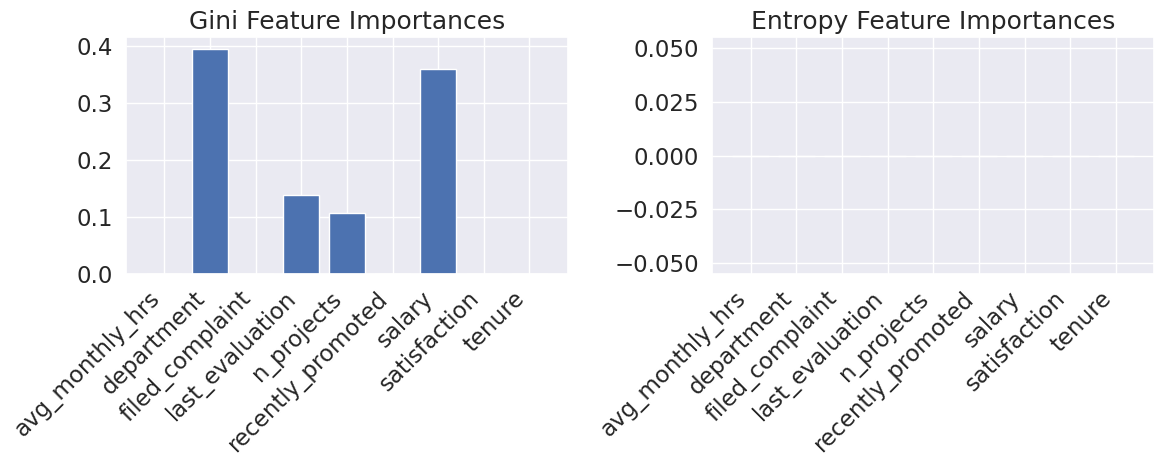

In [26]:
importances_gini = gini_tree.feature_importances_
importances_entropy = entropy_tree.feature_importances_

features = X.columns

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Gini Feature Importances
ax1.bar(features, importances_gini)
ax1.set_title('Gini Feature Importances')
ax1.set_xticklabels(features, rotation=45, ha='right')  # Rotate and align the labels properly

# Bar plot for Entropy Feature Importances
ax2.bar(features, importances_entropy)
ax2.set_title('Entropy Feature Importances')
ax2.set_xticklabels(features, rotation=45, ha='right')  # Rotate and align the labels properly

plt.tight_layout()
plt.show()